<a href="https://colab.research.google.com/github/DiegoAlonso30/mat281-entregables/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [2]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


In [3]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


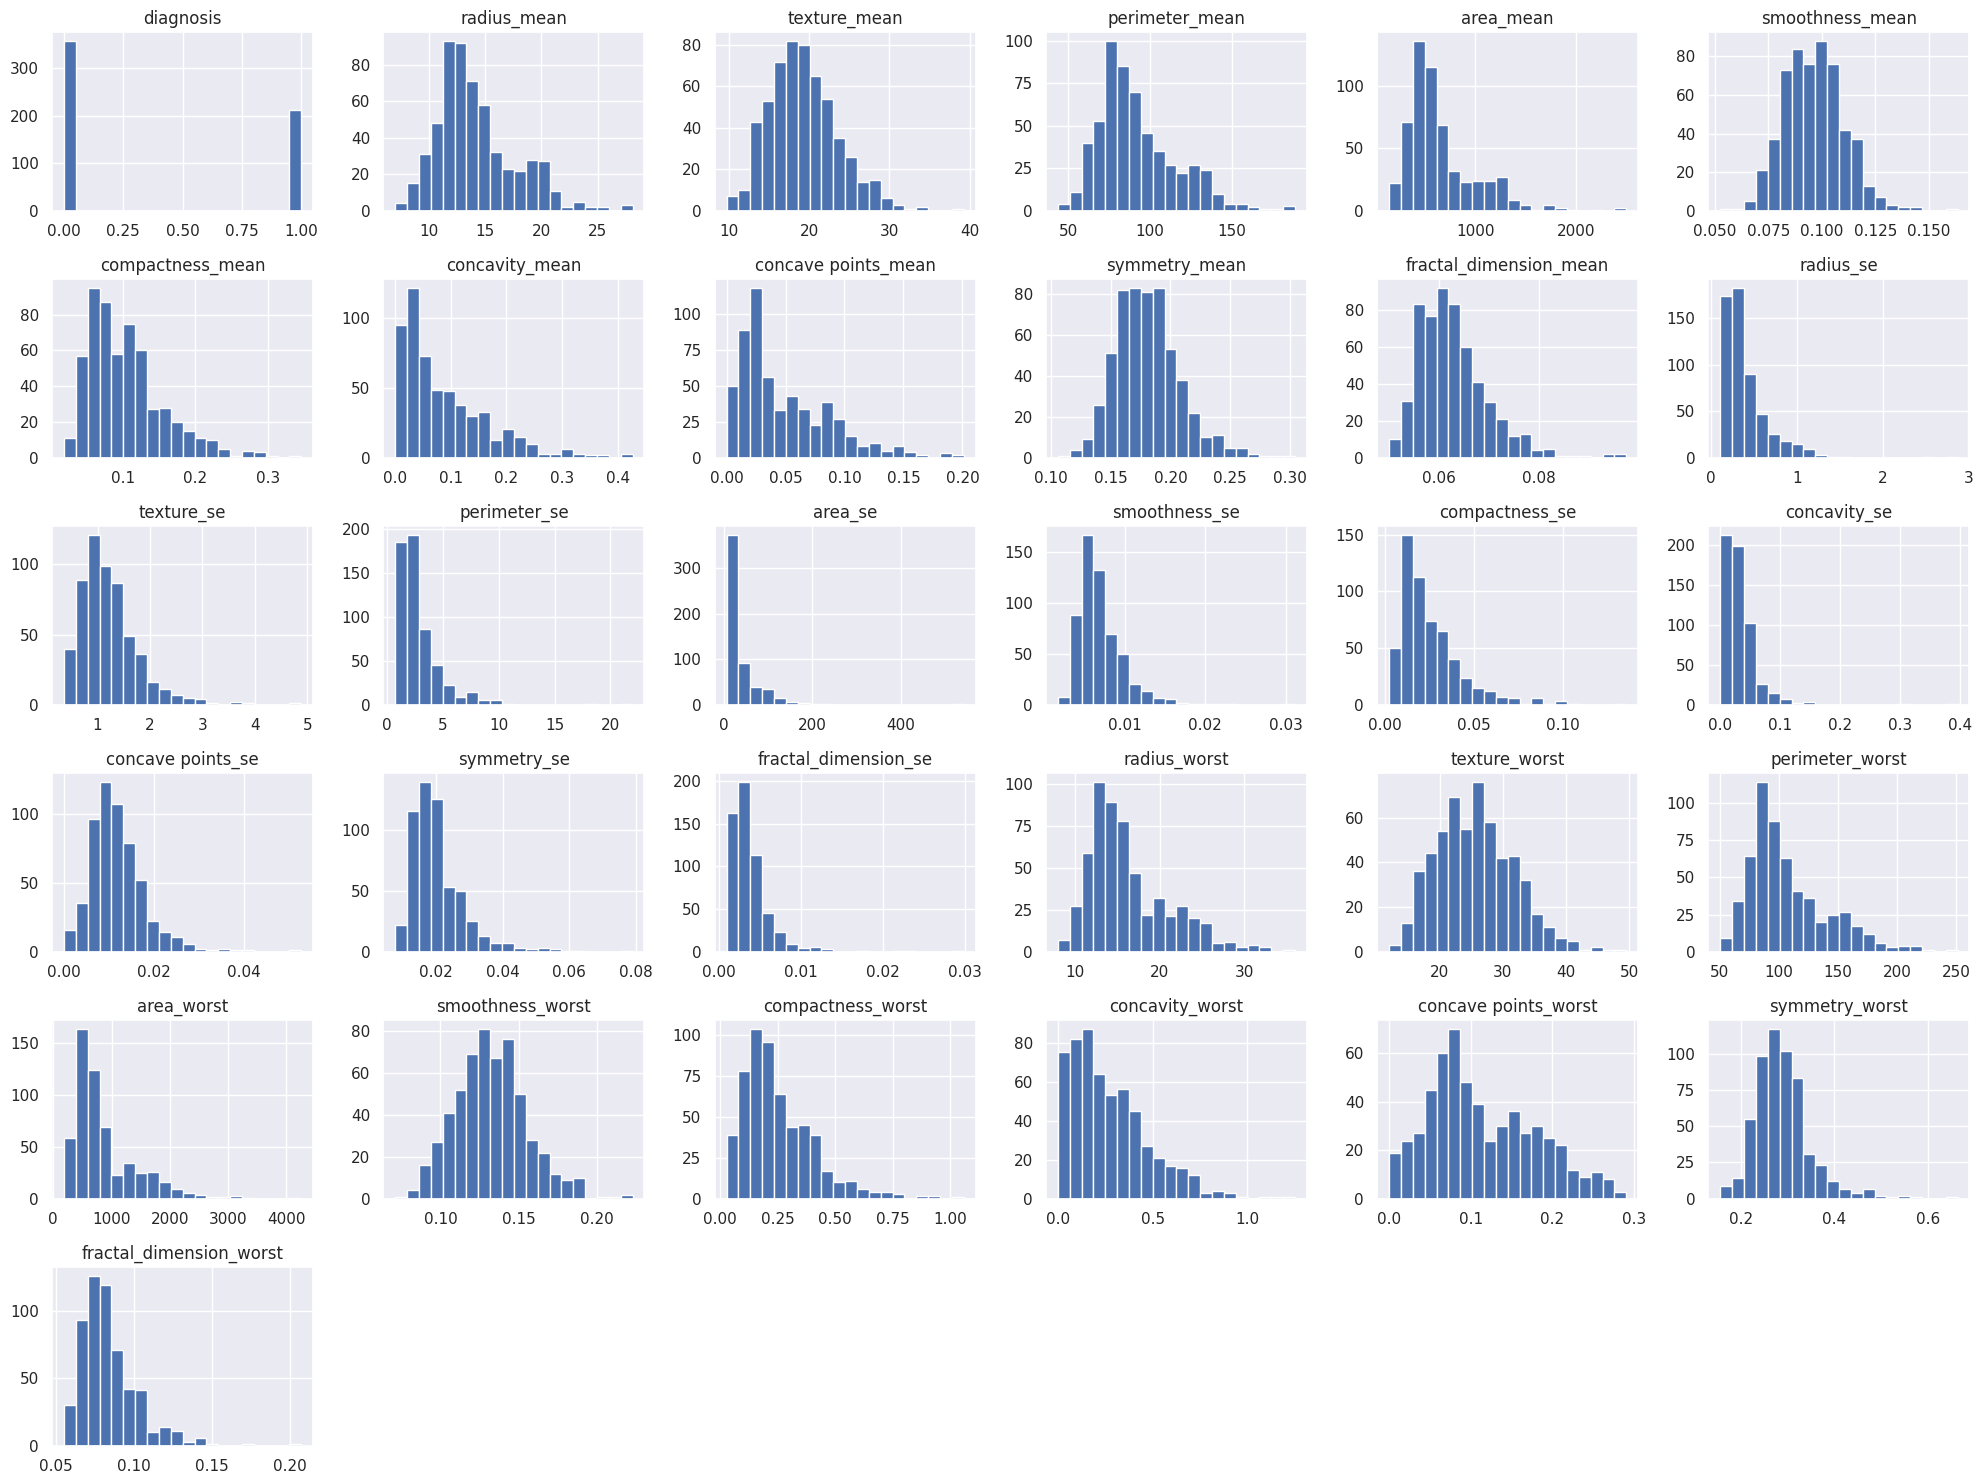

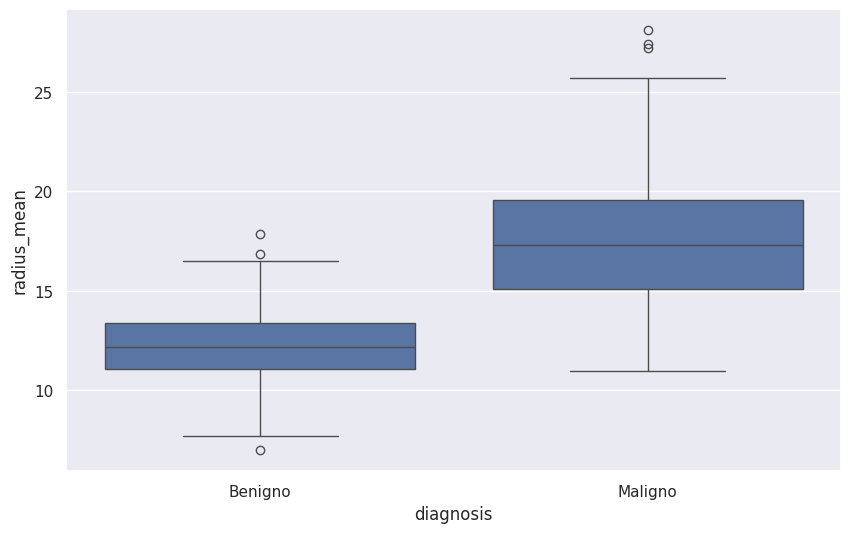

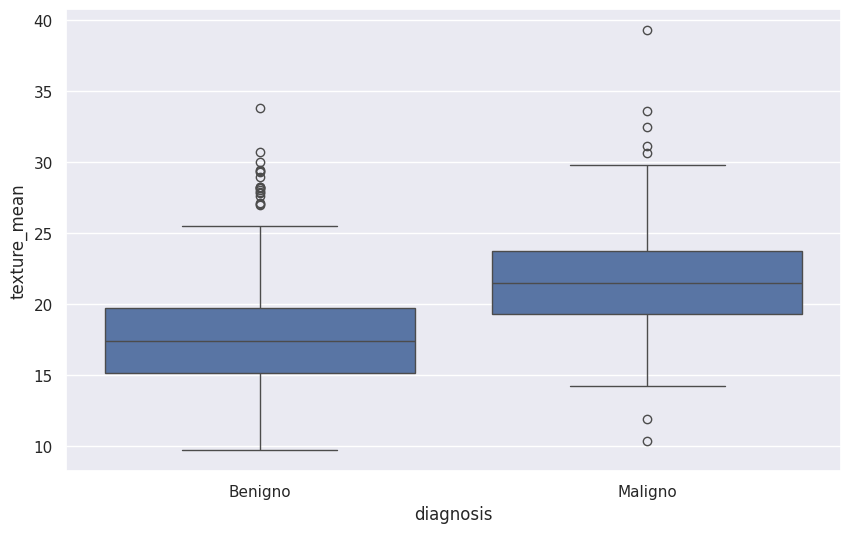

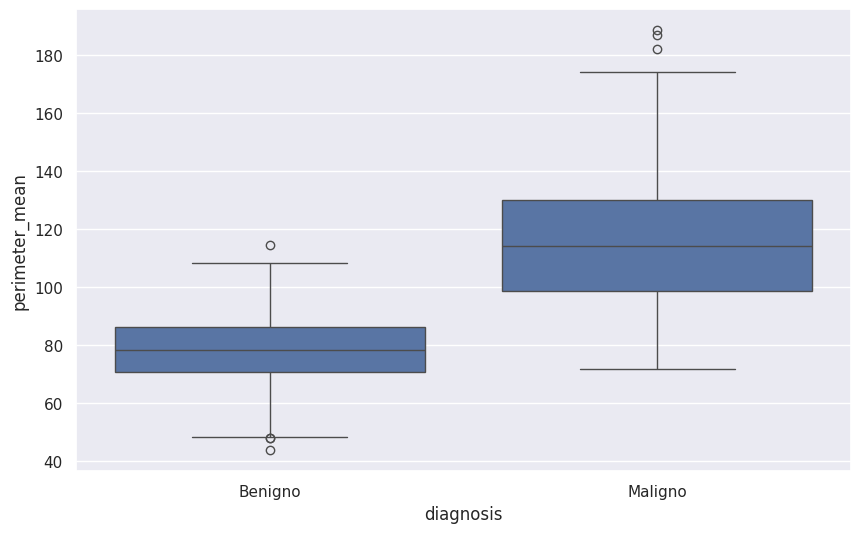

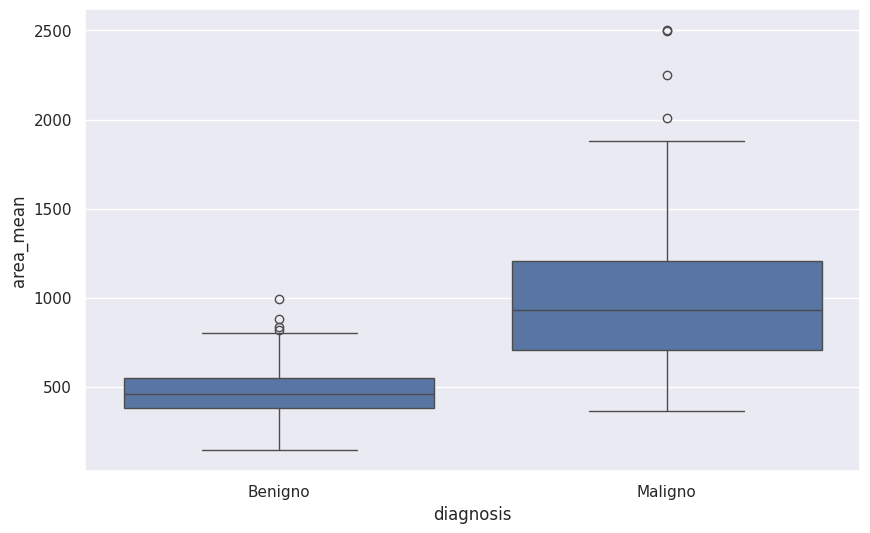

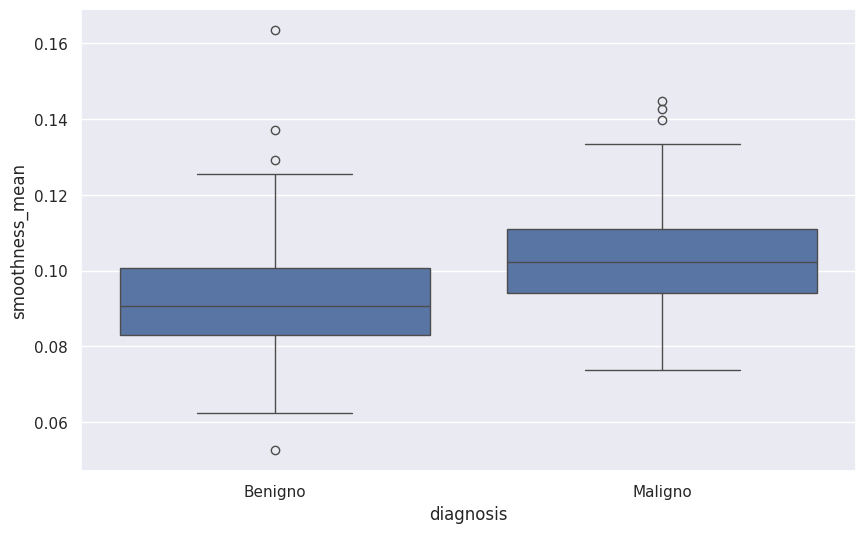

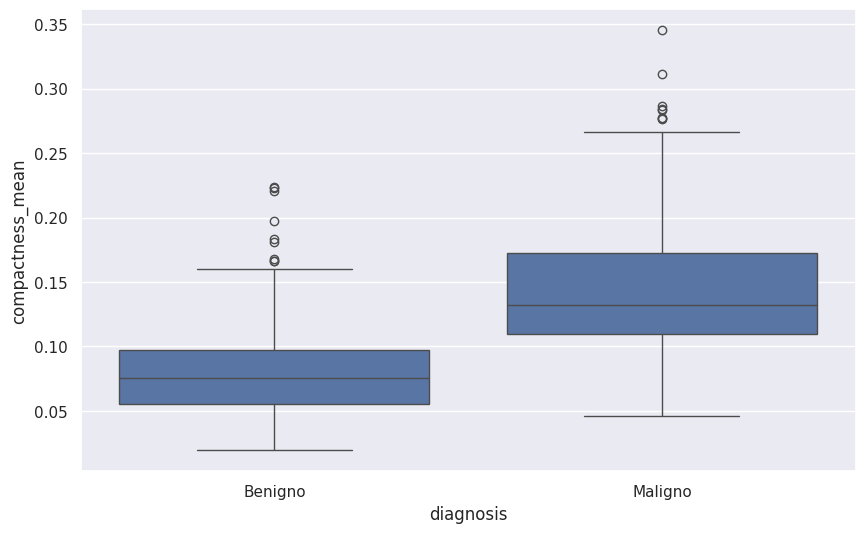

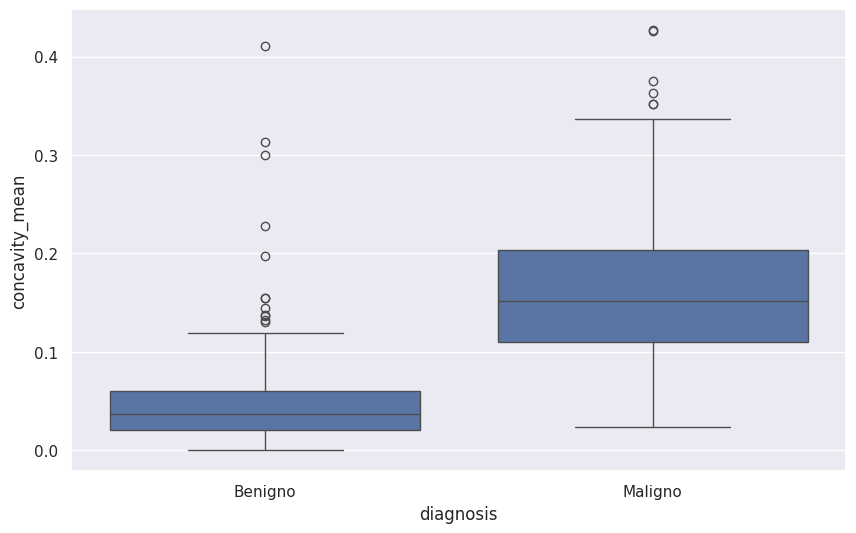

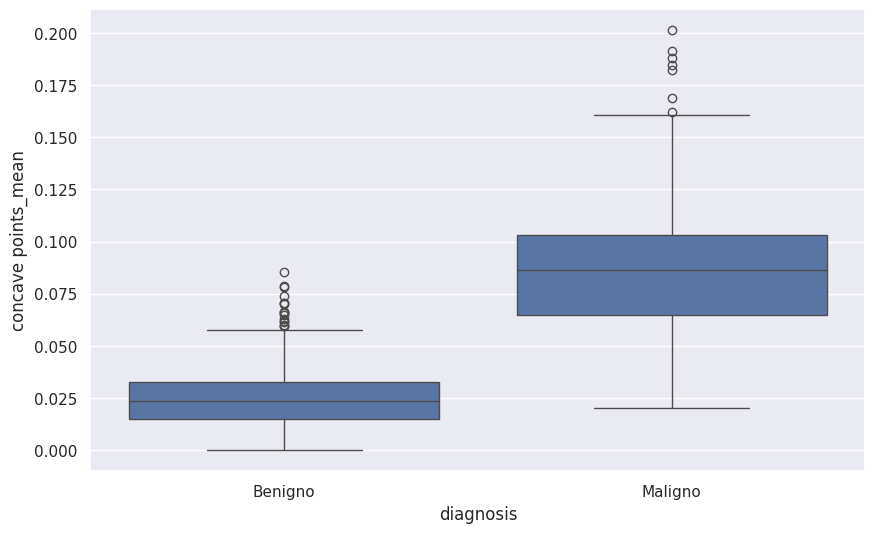

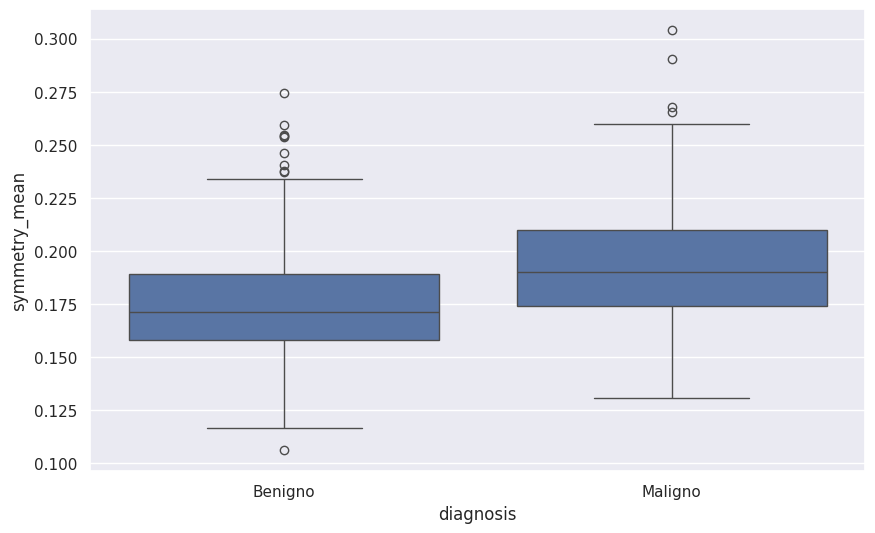

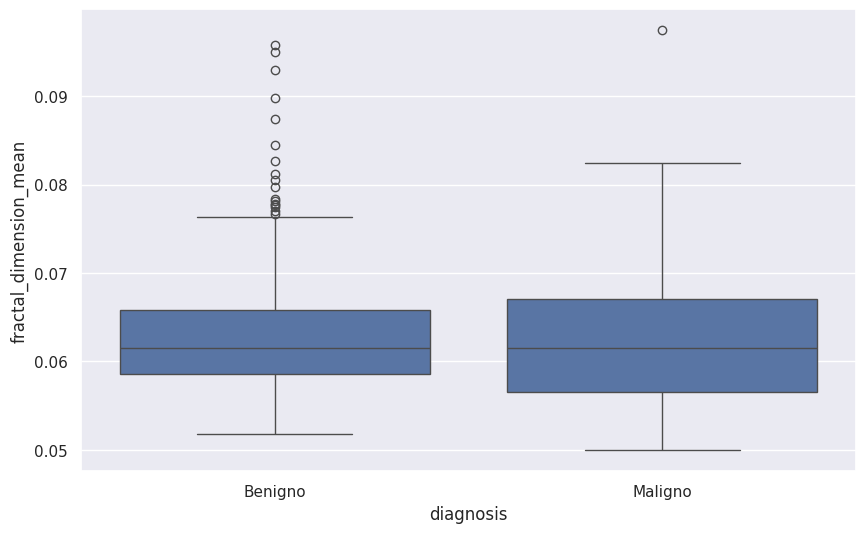

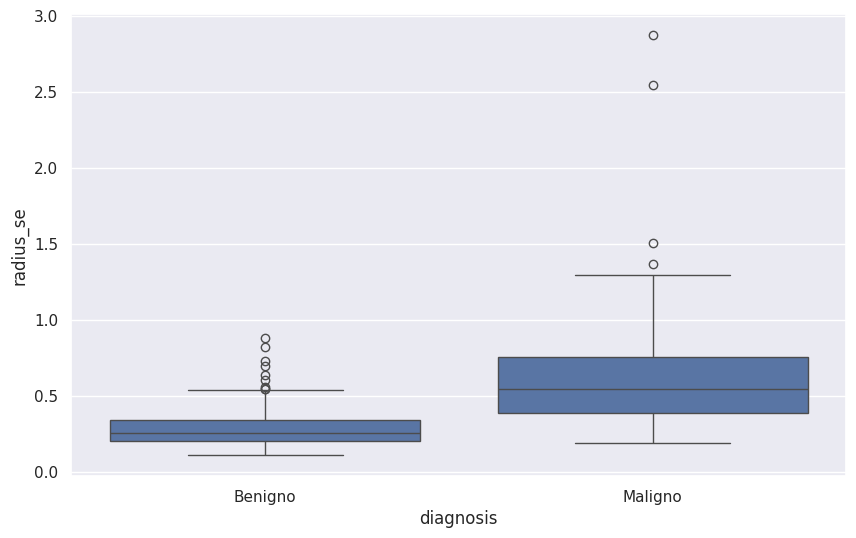

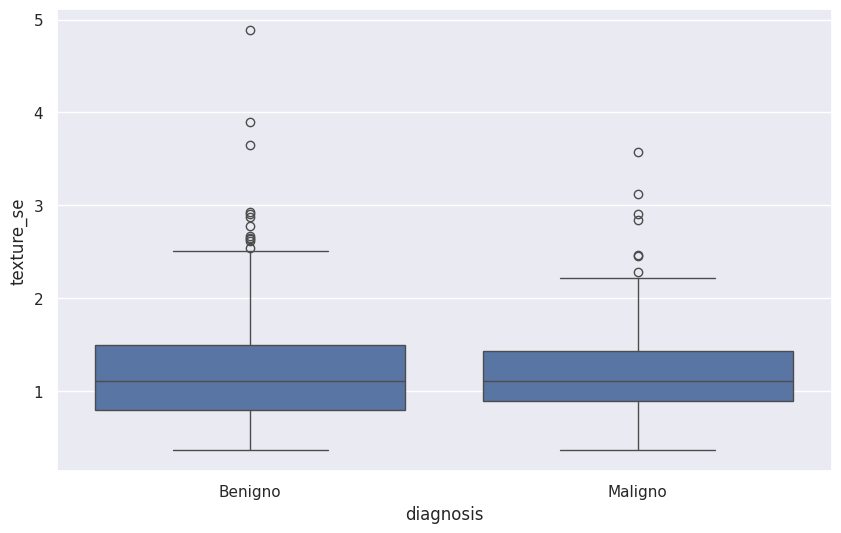

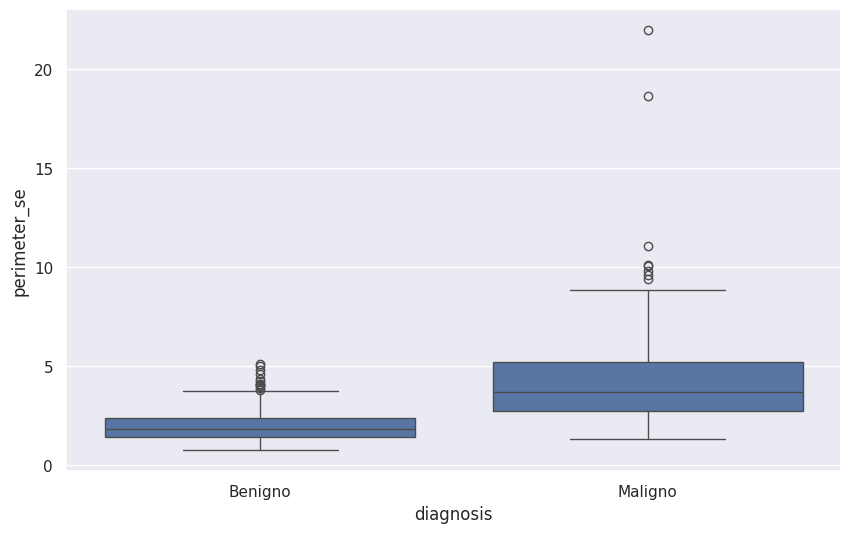

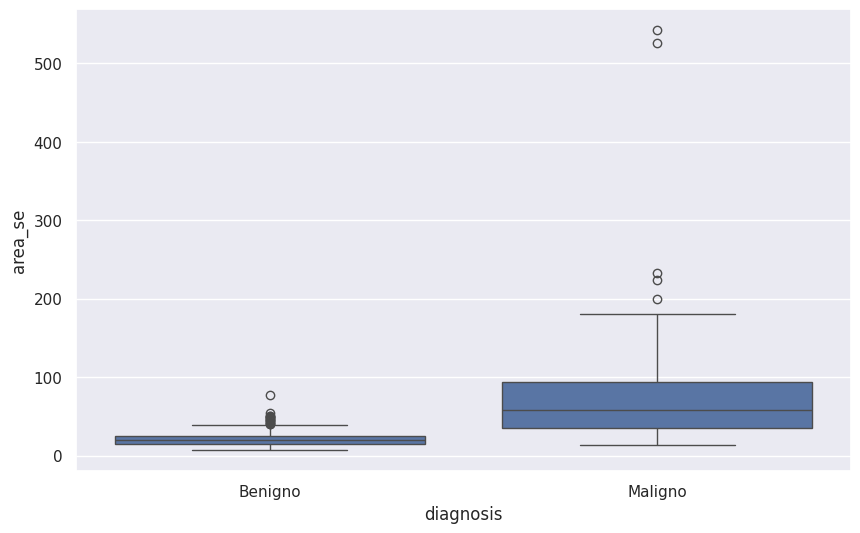

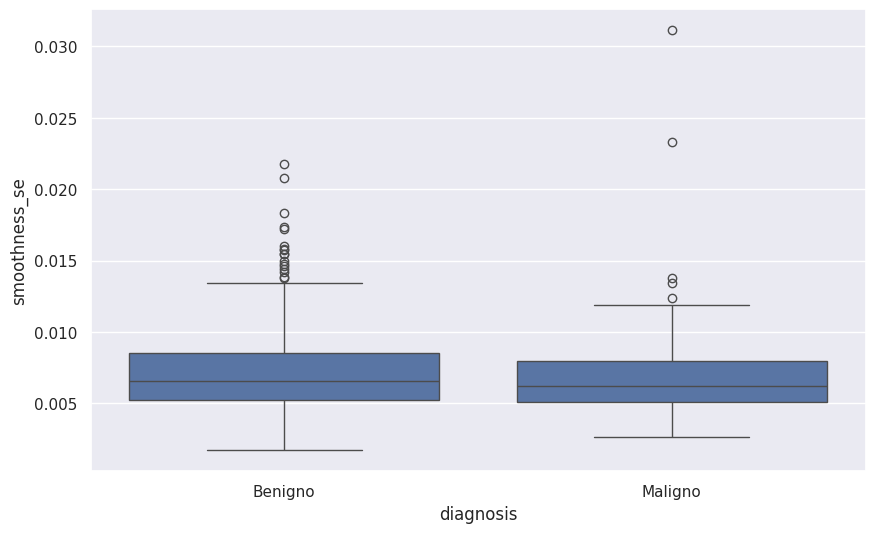

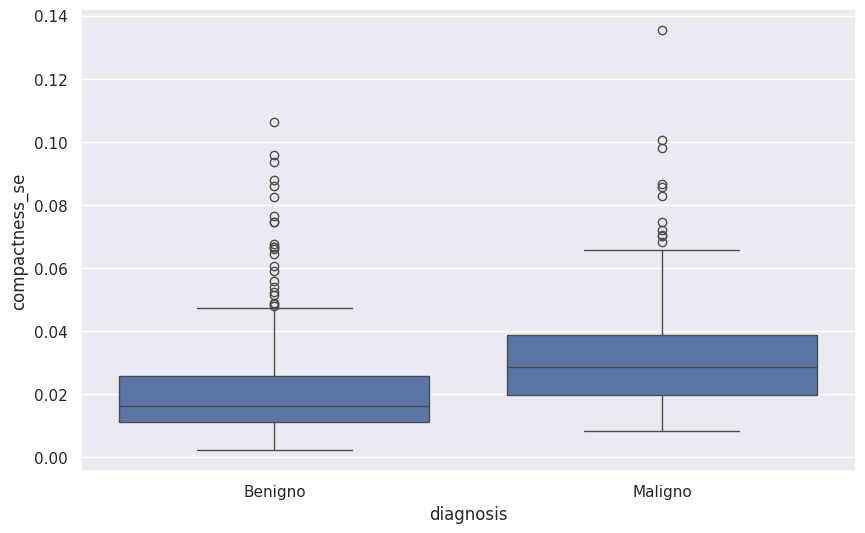

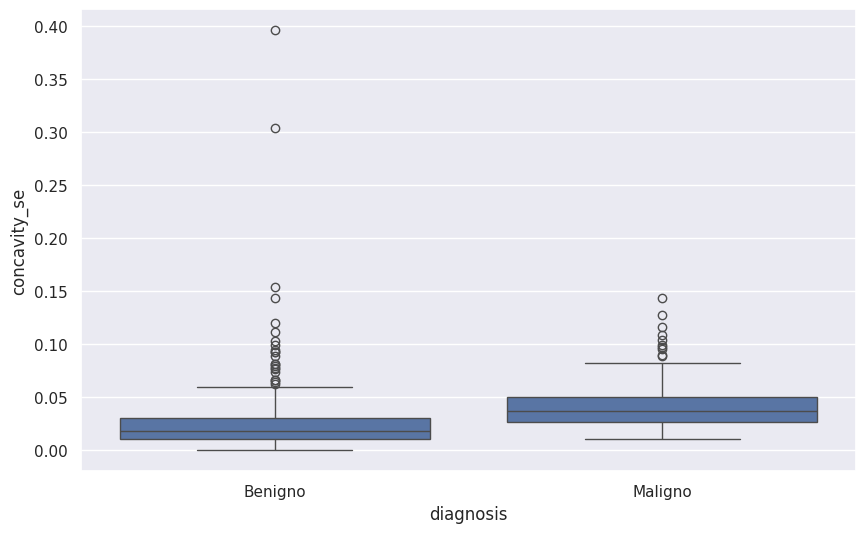

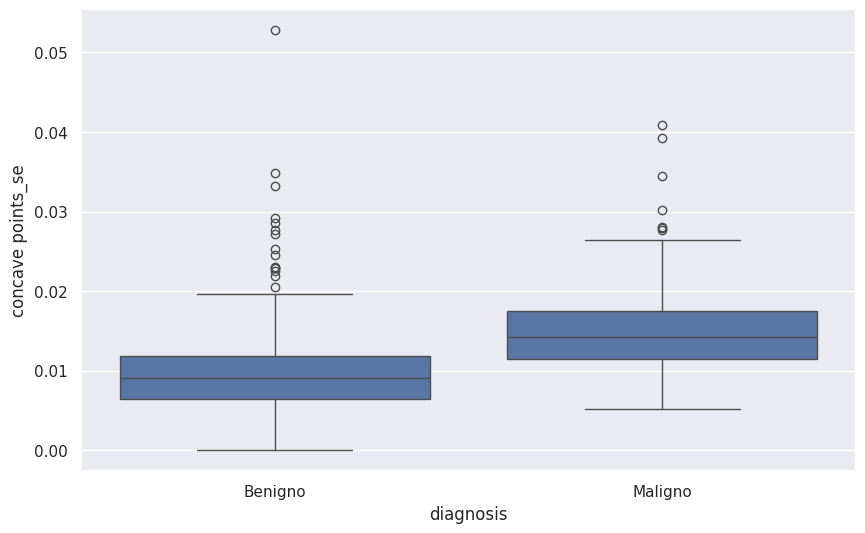

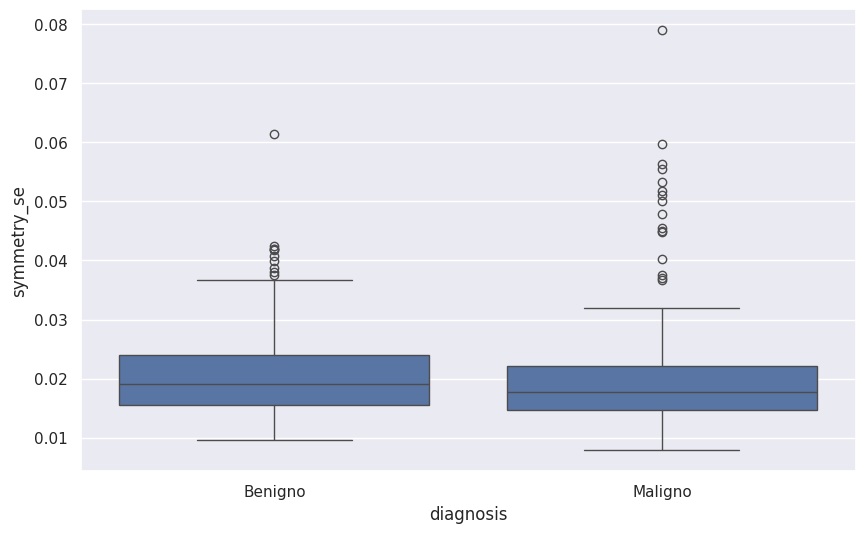

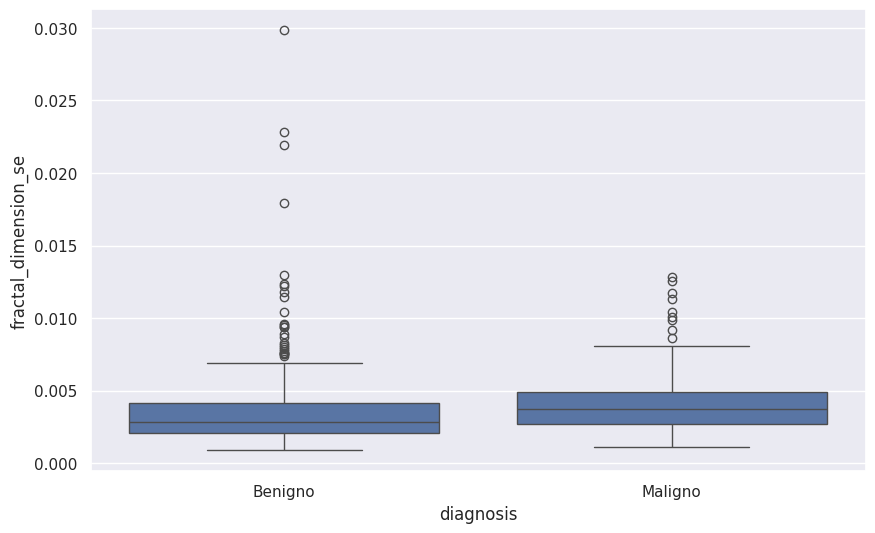

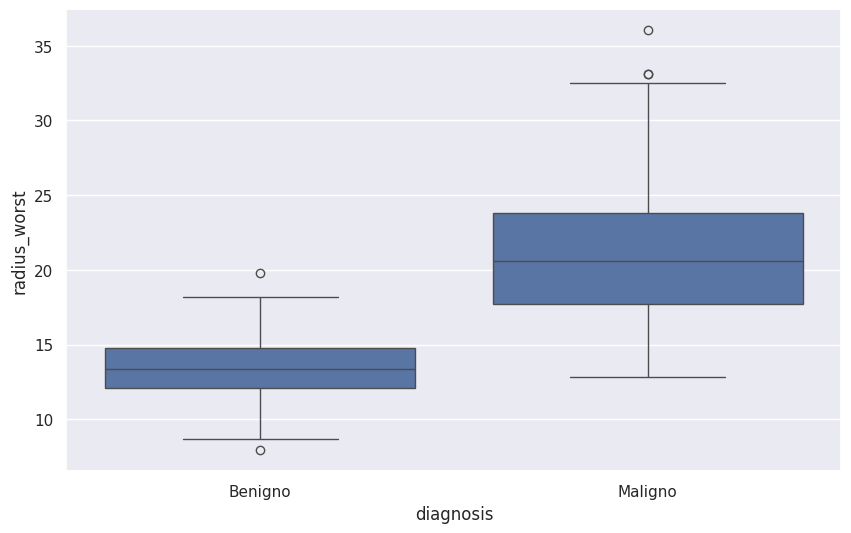

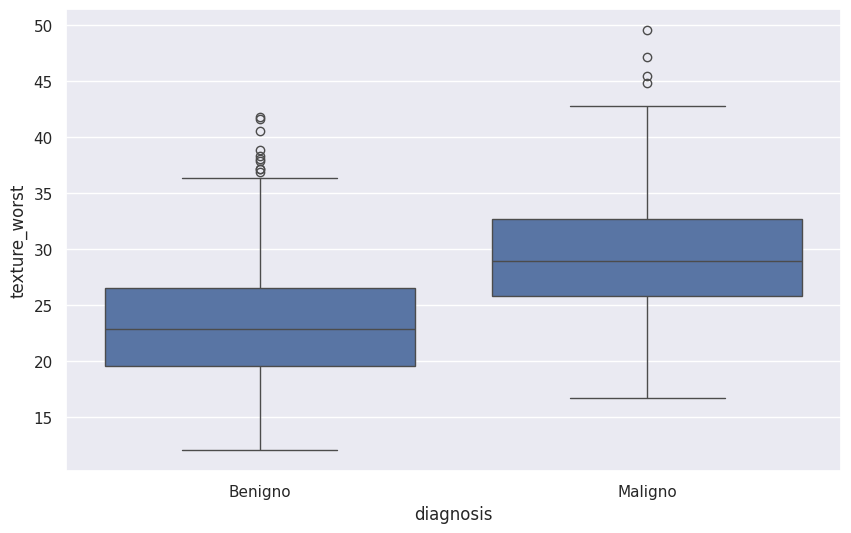

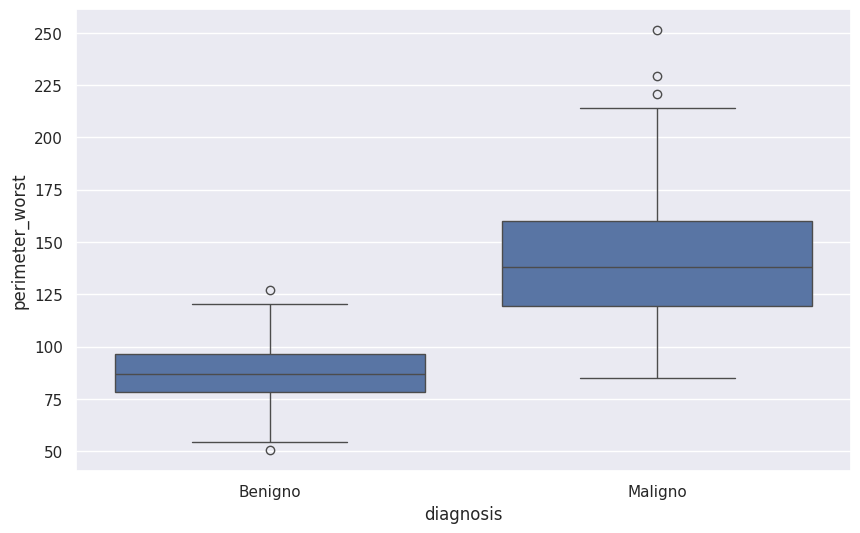

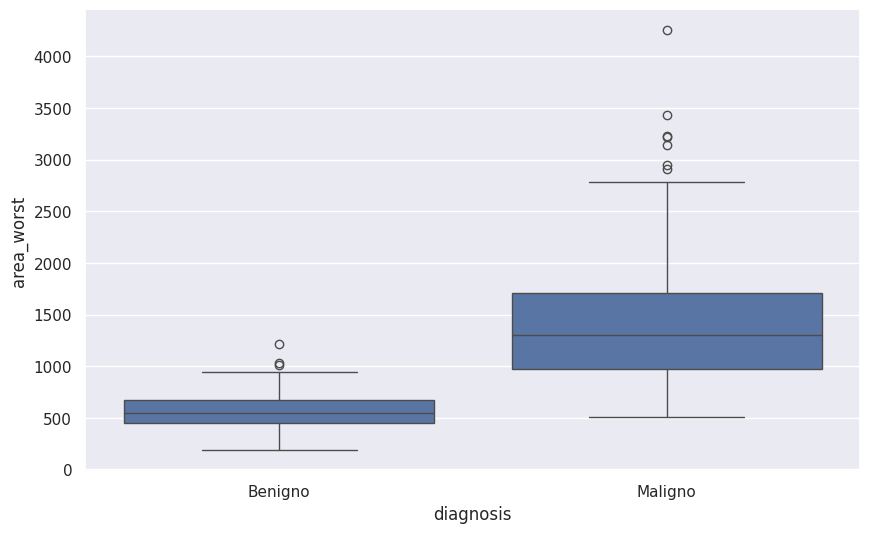

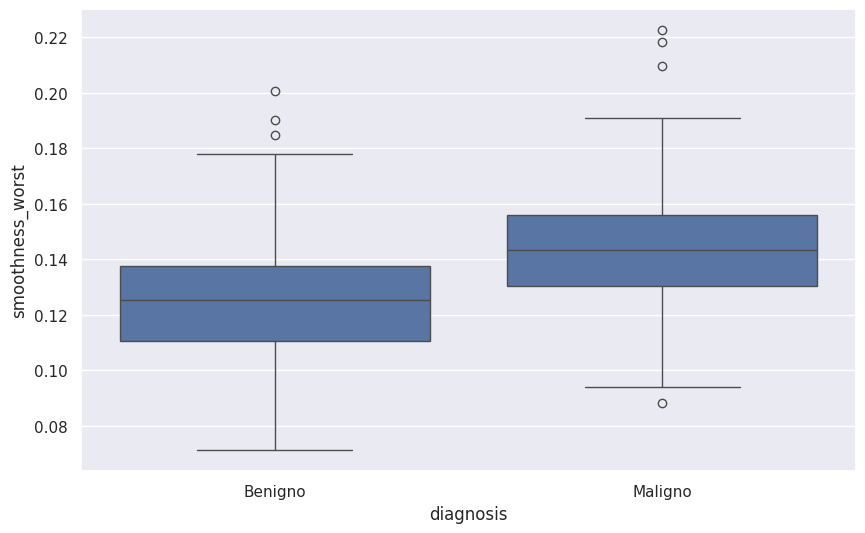

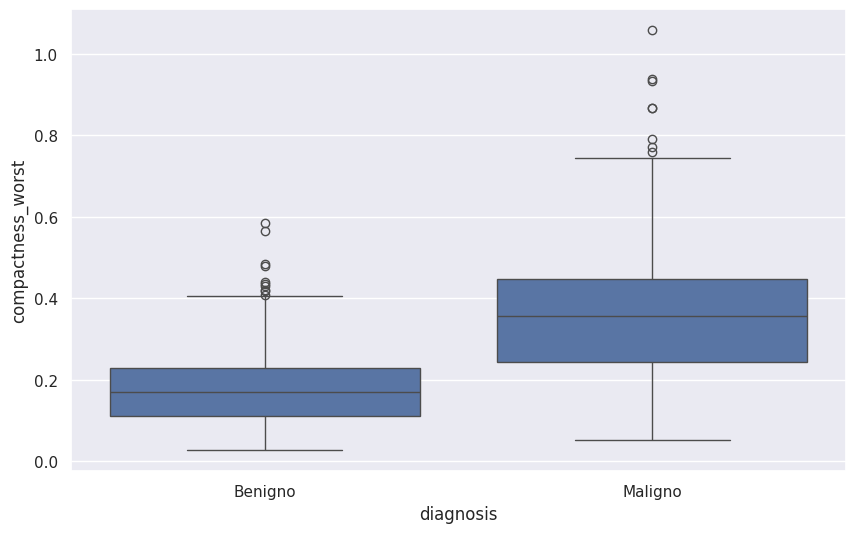

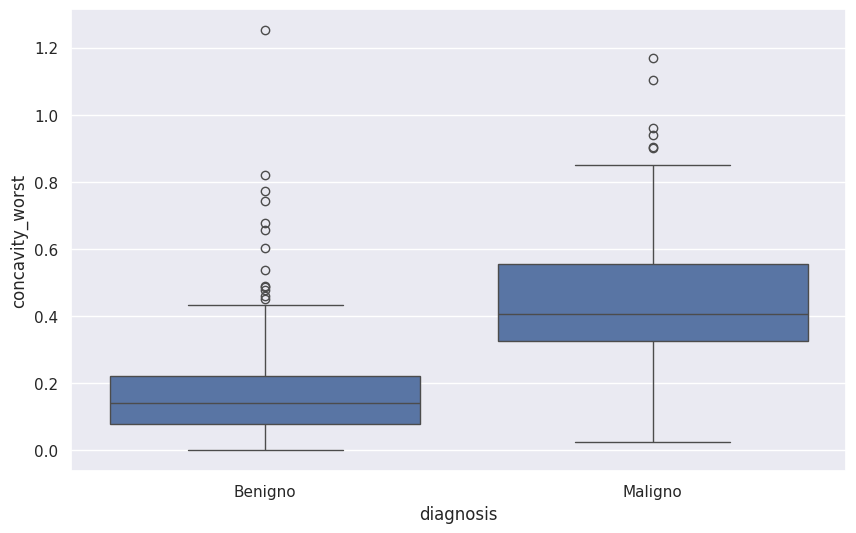

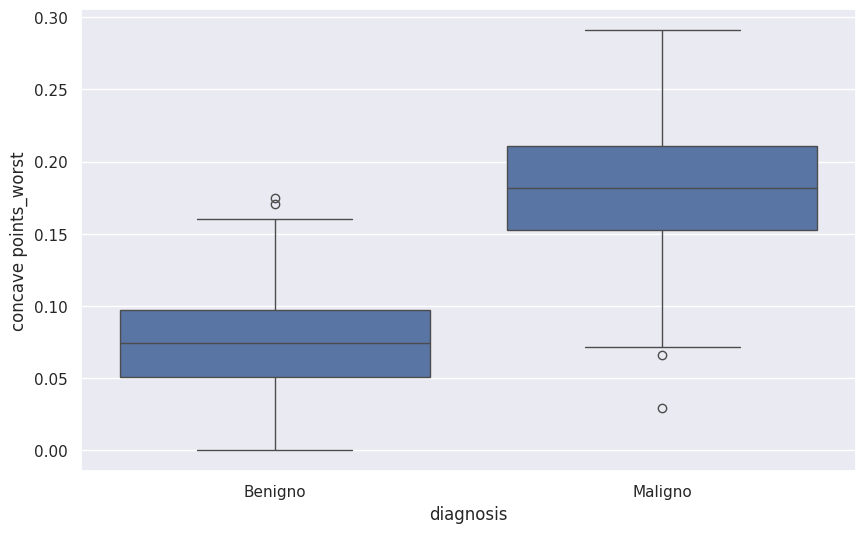

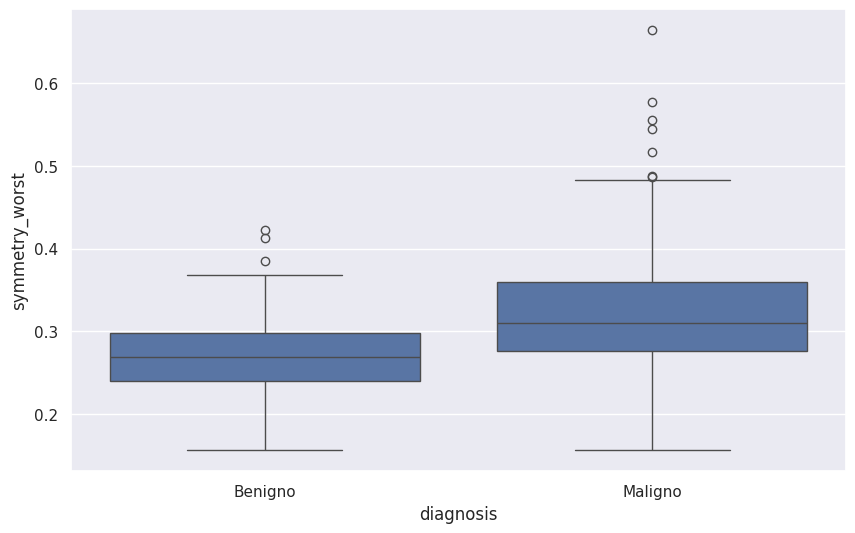

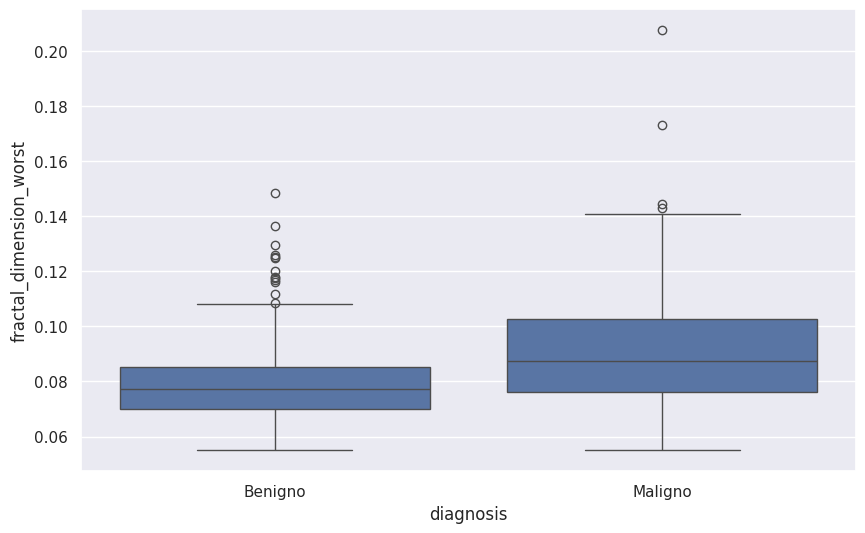

In [4]:
df.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

for column in df.columns:
    if column != 'diagnosis':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='diagnosis', y=column, data=df)
        plt.xticks([0, 1], ['Benigno', 'Maligno'])
        plt.show()

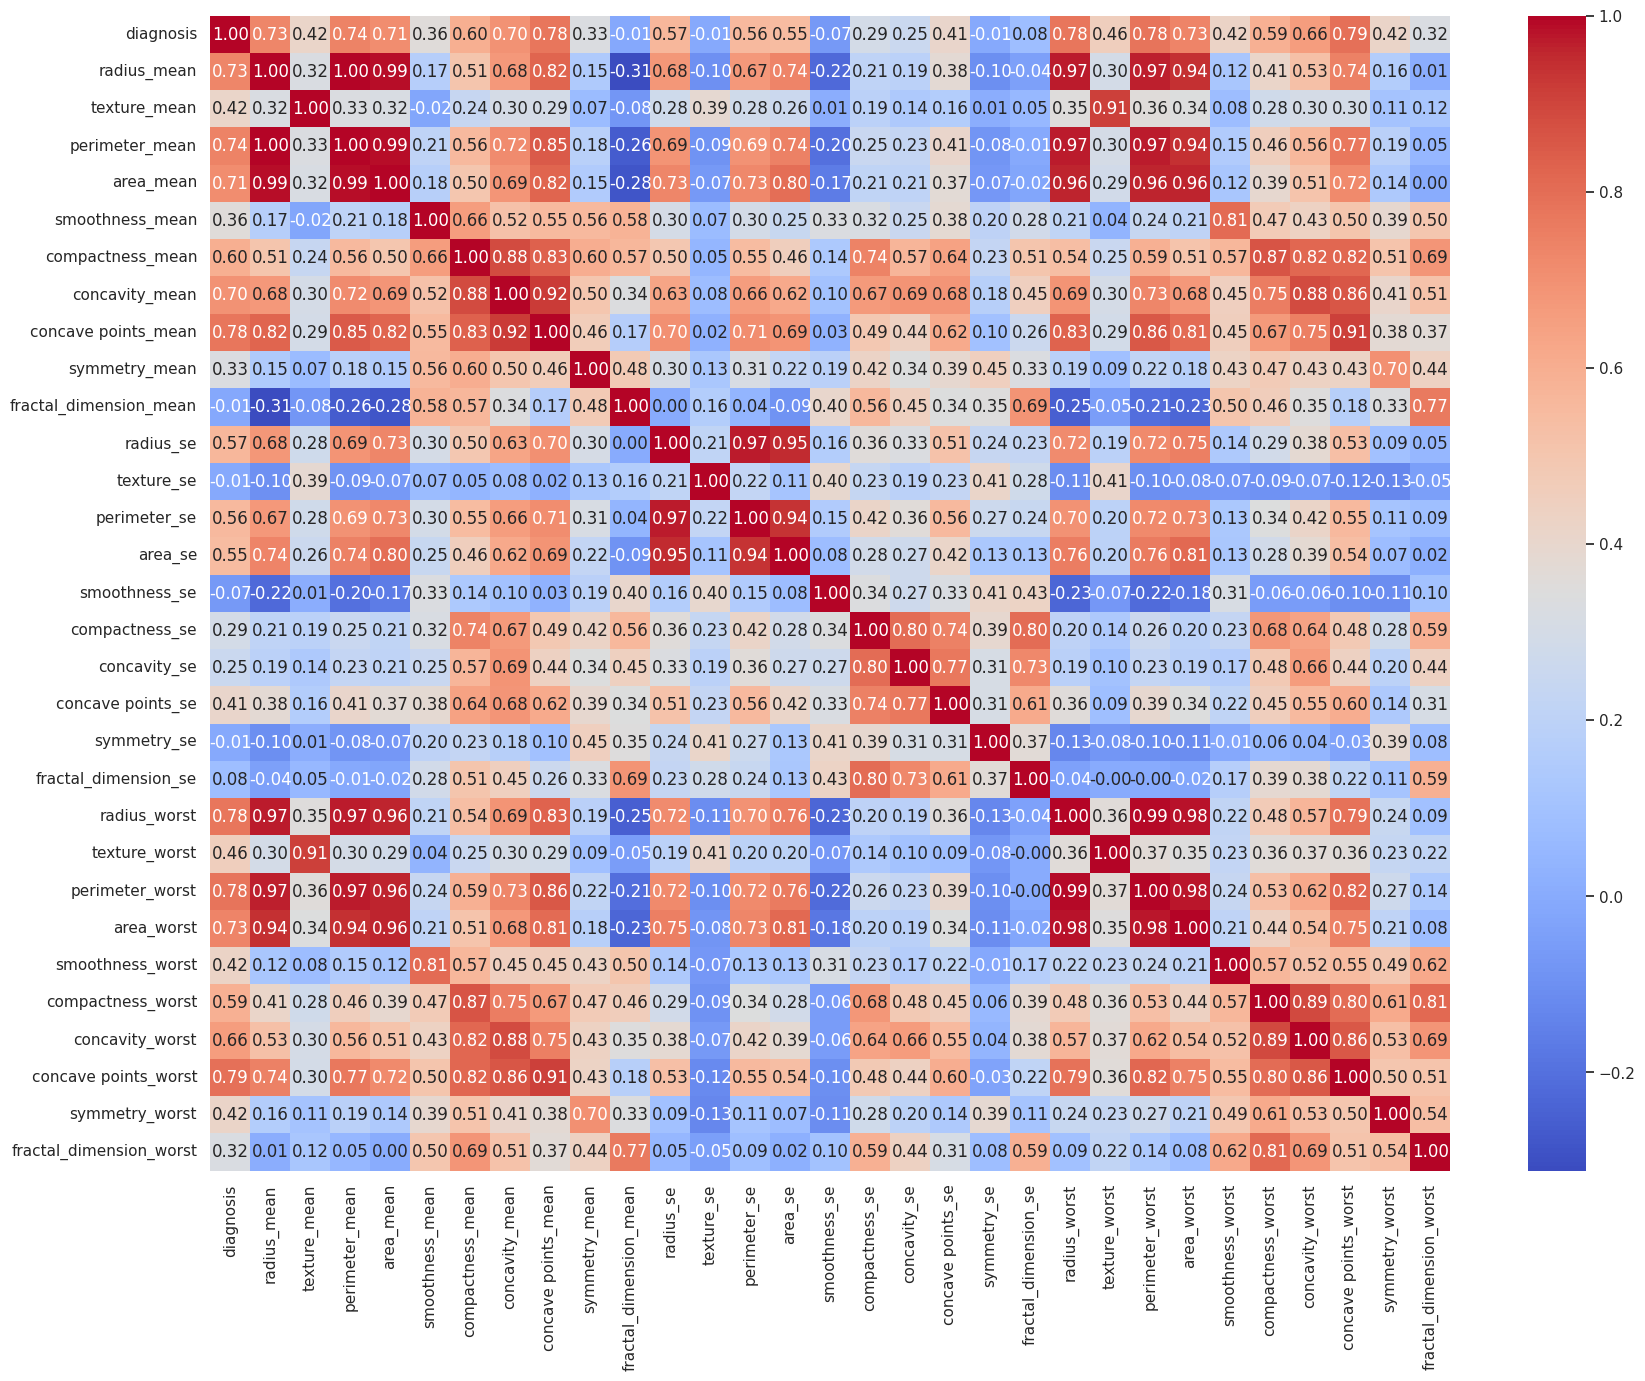

In [5]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

Basándonos en las visualizaciones (histogramas, boxplots) y la matriz de correlación, observamos que algunas variables muestran diferencias más pronunciadas entre los tumores benignos y malignos. Estas variables, cuyas distribuciones para los dos grupos de diagnóstico están más separadas o presentan una correlación alta con la variable 'diagnosis', son candidatas clave para discriminar entre ambos tipos de tumores. Las características que parecen ser más relevantes incluyen aquellas relacionadas con el tamaño, perímetro y área del núcleo celular, así como la concavidad y puntos cóncavos.


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [6]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [7]:
# Exploración de una estrategia de preprocesamiento adicional: Eliminación de características altamente correlacionadas para abordar la multicolinealidad.
# Eliminaremos una de las dos características si su correlación supera un umbral determinado.

corr_matrix = X_scaled_df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

X_processed = X_scaled_df.drop(to_drop, axis=1)

print(f"Features dropped due to high correlation: {to_drop}")
print(f"Number of features after dropping: {X_processed.shape[1]}")

Features dropped due to high correlation: ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']
Number of features after dropping: 20


Justificación de las elecciones de preprocesamiento:

Normalización con StandardScaler: Se utilizó StandardScaler para normalizar las variables numéricas. Esta técnica escala cada característica para que tenga una media de 0 y una desviación estándar de 1. Esto es importante para muchos algoritmos de machine learning que son sensibles a la escala de las características, como los modelos basados en distancia (por ejemplo, SVM, KNN) y los métodos de descenso de gradiente. Al normalizar los datos, evitamos que las características con rangos de valores más grandes dominen a aquellas con rangos más pequeños.
Eliminación de características altamente correlacionadas: Se exploró la eliminación de características que presentan una alta multicolinealidad (correlación superior a 0.9 en valor absoluto). La multicolinealidad puede afectar negativamente a algunos modelos, como la regresión logística, al dificultar la interpretación de los coeficientes y aumentar la varianza de las estimaciones. Al eliminar una de las características altamente correlacionadas, reducimos la redundancia en los datos y potencialmente mejoramos la estabilidad y el rendimiento del modelo. Se eligió un umbral de 0.9 como criterio para considerar la alta correlación, aunque este valor puede ajustarse.


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

pca_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'], index=X_processed.index)
pca_df['diagnosis'] = y

In [10]:
print(f"Proporción de varianza explicada por cada componente principal: {pca.explained_variance_ratio_}")
print(f"Varianza total explicada por los 2 componentes principales: {np.sum(pca.explained_variance_ratio_)}")

Proporción de varianza explicada por cada componente principal: [0.42612628 0.1345146 ]
Varianza total explicada por los 2 componentes principales: 0.5606408718901641


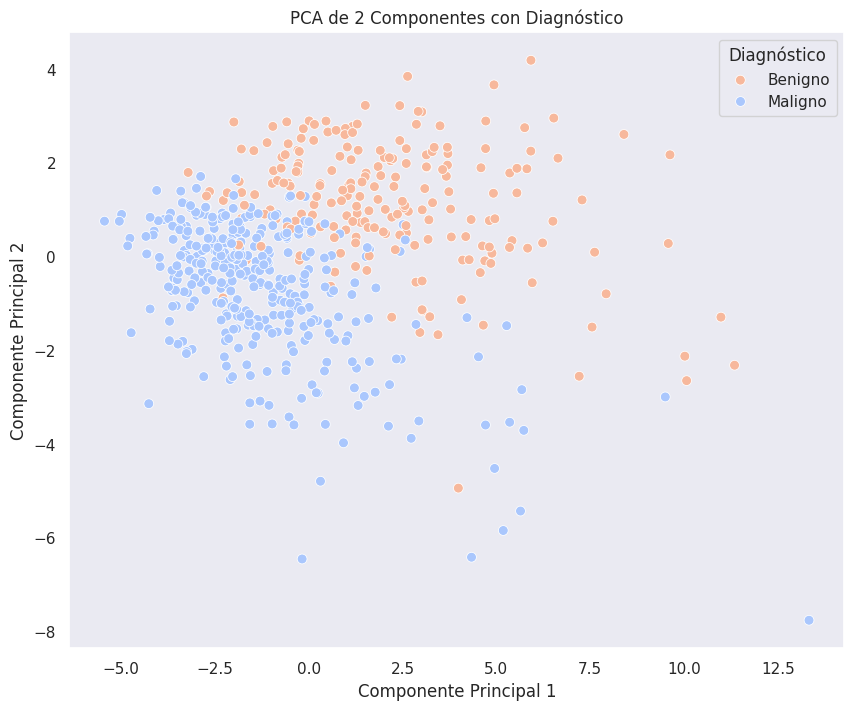

In [11]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='diagnosis', data=pca_df, palette='coolwarm', s=50)
plt.title('PCA de 2 Componentes con Diagnóstico')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Diagnóstico', labels=['Benigno', 'Maligno'])
plt.grid()
plt.show()

**Análisis de la reducción de dimensionalidad con PCA:**

Hemos aplicado el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de los datos preprocesados a 2 componentes principales. La proporción de varianza explicada por cada componente principal indica cuánta información (variabilidad) del conjunto de datos original es capturada por cada componente. La suma de estas proporciones nos da la varianza total explicada por los componentes seleccionados.

En la visualización del espacio reducido por PCA, podemos observar cómo se distribuyen las instancias de tumores benignos y malignos. Una buena separación de clústeres en este gráfico sugiere que los componentes principales logran capturar las diferencias clave entre las dos clases, lo que facilitaría la tarea de un clasificador lineal o basado en distancia en este espacio de menor dimensión.

Basándonos en el gráfico, podemos discutir qué tan bien se separan visualmente las clases en este espacio bidimensional y si PCA parece ser una técnica efectiva para este conjunto de datos en términos de preservación de la estructura discriminativa.


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

In [13]:
# Regresión Logística
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=200), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

print("Regresión Logística:")
print(f"Mejores parámetros: {grid_search_lr.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr):.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_lr))

fpr_lr, tpr_lr, _ = roc_curve(y_test, best_lr.predict_proba(X_test)[:, 1])
auc_lr = auc(fpr_lr, tpr_lr)
print(f"AUC-ROC: {auc_lr:.4f}")

Regresión Logística:
Mejores parámetros: {'C': 1}
Accuracy: 0.9766
Precision: 0.9538
Recall: 0.9841
F1-score: 0.9688
Matriz de Confusión:
[[105   3]
 [  1  62]]
AUC-ROC: 0.9957


In [14]:
# SVM
param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

print("\nSVM:")
print(f"Mejores parámetros: {grid_search_svm.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_svm):.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_svm))

fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm.predict_proba(X_test)[:, 1])
auc_svm = auc(fpr_svm, tpr_svm)
print(f"AUC-ROC: {auc_svm:.4f}")


SVM:
Mejores parámetros: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9708
Precision: 0.9531
Recall: 0.9683
F1-score: 0.9606
Matriz de Confusión:
[[105   3]
 [  2  61]]
AUC-ROC: 0.9935


In [15]:
# Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\nRandom Forest:")
print(f"Mejores parámetros: {grid_search_rf.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))

fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
auc_rf = auc(fpr_rf, tpr_rf)
print(f"AUC-ROC: {auc_rf:.4f}")


Random Forest:
Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9708
Precision: 0.9677
Recall: 0.9524
F1-score: 0.9600
Matriz de Confusión:
[[106   2]
 [  3  60]]
AUC-ROC: 0.9907


Observando las métricas de rendimiento (Accuracy, Precision, Recall, F1-score y AUC-ROC) para la Regresión Logística, SVM y Random Forest, podemos ver que los tres modelos obtuvieron resultados muy buenos en el conjunto de prueba después de la optimización de hiperparámetros.

La Regresión Logística presenta un Accuracy, Precision, Recall y F1-score altos, con un AUC-ROC también muy cercano a 1, lo que indica una excelente capacidad de discriminación.
SVM con kernel lineal también muestra métricas de rendimiento sólidas, muy similares a la Regresión Logística.
Random Forest tiene un rendimiento comparable, con una alta precisión pero un recall ligeramente menor en comparación con los otros dos modelos en este conjunto de prueba específico.
Considerando las métricas generales y la simplicidad, la Regresión Logística y SVM con kernel lineal parecen ofrecer un excelente compromiso entre precisión y generalización para este conjunto de datos, mostrando consistentemente un alto rendimiento en la clasificación de tumores mamarios. La elección final entre ellos podría depender de otros factores como el tiempo de entrenamiento o la interpretabilidad del modelo, aunque en este caso ambos son relativamente eficientes y, en el caso de la Regresión Logística, más interpretable. Random Forest también es una opción viable con un rendimiento muy cercano.


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



## 5. Conclusiones y reflexiones:

**Modelo más apropiado:**

Basándonos en las métricas de evaluación obtenidas en la Tarea 4, tanto la Regresión Logística como el SVM con kernel lineal mostraron un rendimiento excepcional y comparable en la clasificación de tumores mamarios, con altos valores de accuracy, precision, recall, F1-score y AUC-ROC. Ambos modelos lograron una excelente capacidad de discriminación entre tumores benignos y malignos.

Considerando la simplicidad y la interpretabilidad, la **Regresión Logística** podría considerarse ligeramente más apropiada en un contexto médico donde la comprensión de cómo las características influyen en el diagnóstico es importante. Sin embargo, el rendimiento muy similar de **SVM lineal** también lo convierte en una opción muy sólida. Random Forest, aunque también tuvo un buen desempeño, presentó un recall un poco menor en este conjunto de datos específico.

**Impacto del preprocesamiento y la reducción de dimensionalidad:**

*   **Normalización (StandardScaler):** La normalización fue un paso crucial. Al escalar las características, aseguramos que ningún atributo dominara a otros debido a su escala, lo cual es especialmente importante para modelos sensibles a la distancia como SVM y métodos basados en gradiente como la Regresión Logística. Esto contribuyó a que los algoritmos convergieran más eficientemente y obtuvieran un mejor rendimiento.
*   **Eliminación de multicolinealidad:** La eliminación de características altamente correlacionadas ayudó a reducir la redundancia en los datos. Si bien en este conjunto de datos particular los modelos lineales ya obtenían buenos resultados, en otros escenarios, la multicolinealidad puede afectar la estabilidad y la interpretabilidad de los coeficientes del modelo (especialmente en Regresión Logística). Esta estrategia simplificó el conjunto de características sin una pérdida significativa de información discriminativa para los modelos utilizados.
*   **Reducción de dimensionalidad (PCA):** La aplicación de PCA a 2 componentes principales, aunque solo capturó alrededor del 56% de la varianza total, mostró una separación visual clara entre las clases benigna y maligna en el espacio bidimensional. Esto sugiere que las dos primeras componentes principales lograron capturar gran parte de la variabilidad relevante para la clasificación. Si bien para este conjunto de datos con ~20 características después de la eliminación de multicolinealidad, la reducción a 2 componentes podría ser drástica para algunos modelos, la visualización demostró que la estructura discriminativa principal se mantuvo. En conjuntos de datos con muchas más características, PCA sería aún más valioso para reducir la complejidad computacional y evitar el sobreajuste.

**Posibles mejoras o enfoques alternativos en un escenario real:**

*   **Recopilación de más datos:** Un conjunto de datos más grande y diverso podría mejorar la generalización de los modelos.
*   **Exploración de más modelos:** Probar otros algoritmos de clasificación como Gradient Boosting (XGBoost, LightGBM) o redes neuronales.
*   **Optimización de hiperparámetros más exhaustiva:** Utilizar técnicas más avanzadas como optimización bayesiana o búsqueda aleatoria con rangos de parámetros más amplios.
*   **Validación cruzada estratificada:** Asegurar que las proporciones de clases se mantengan en cada pliegue de la validación cruzada, especialmente si el conjunto de datos estuviera desbalanceado.
*   **Considerar el desbalance de clases:** Si las clases benigna y maligna tuvieran proporciones muy diferentes, se podrían aplicar técnicas para manejar el desbalance, como sobremuestreo (SMOTE) o submuestreo.
*   **Evaluación con métricas clínicas:** Además de las métricas de ML, evaluar el modelo con métricas relevantes en el contexto médico, como la sensibilidad (recall para la clase maligna) y la especificidad (recall para la clase benigna).
*   **Interpretabilidad del modelo:** En un entorno clínico, la capacidad de explicar por qué un modelo hizo una predicción particular es crucial. Modelos como la Regresión Logística o el análisis de importancia de características en Random Forest son útiles. Técnicas de interpretabilidad (LIME, SHAP) podrían aplicarse a modelos más complejos.
*   **Validación externa:** Probar el modelo en un conjunto de datos completamente independiente para evaluar su verdadera capacidad de generalización.
*   **Integración con expertos clínicos:** Trabajar en estrecha colaboración con médicos y patólogos para refinar el modelo, validar las características importantes y asegurar que el enfoque sea clínicamente relevante y seguro.